In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For validation
from sklearn.model_selection import train_test_split as split

# For transformations and predictions
from scipy.optimize import curve_fit
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# For models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# For boosting
from sklearn.ensemble import AdaBoostClassifier

# For scoring
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

In [53]:
## Import the dataset
df = pd.read_csv('data.csv')
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [54]:
# Remove duplicated
df = df[~df.duplicated()==1]

In [55]:
# Transform milliseconds to minutes
df["duration_mins"] = df["duration_ms"]/60000
df.drop(columns="duration_ms", inplace=True)


In [56]:
# Checking null value in dataset
df.isnull().sum()

acousticness        0
artists             0
danceability        0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
duration_mins       0
dtype: int64

In [57]:
## Drop unnecessary columns 
track_features = df.copy()


track_features = track_features.drop(["artists","duration_mins","explicit","id","instrumentalness","key","mode","name","popularity","release_date","speechiness","tempo","year"], axis=1)
# data.loc[(df.energy >= 0.5 ) & ( df.valence >= 0.5), "mood" ] = 'Happy'
# data.loc[(df.energy >= 0.5 ) & ( df.valence < 0.5), "mood" ] = 'Angry'
# data.loc[(df.energy < 0.5 ) & ( df.valence >= 0.5), "mood" ] = 'Calm'
# data.loc[(df.energy < 0.5 ) & ( df.valence < 0.5), "mood" ] = 'Sad'

# data.loc[(data.mood == 'Happy'), "mood_type" ] = 0
# data.loc[(data.mood == 'Sad'), "mood_type" ] = 1
# data.loc[(data.mood == 'Angry'), "mood_type" ] = 2
# data.loc[(data.mood == 'Calm'), "mood_type" ] = 3
# data
km = KMeans(n_clusters=4)
km.fit(track_features)

track_features

,acousticness,danceability,energy,liveness,loudness,valence
0,0.9950,0.708,0.1950,0.1510,-12.428,0.7790
1,0.9940,0.379,0.0135,0.0763,-28.454,0.0767
2,0.6040,0.749,0.2200,0.1190,-19.924,0.8800
3,0.9950,0.781,0.1300,0.1110,-14.734,0.7200
4,0.9900,0.210,0.2040,0.0980,-16.829,0.0693
...,...,...,...,...,...,...
169904,0.1730,0.875,0.4430,0.0891,-7.461,0.3060
169905,0.0167,0.719,0.3850,0.1110,-10.907,0.2700
169906,0.5380,0.514,0.5390,0.1080,-9.332,0.1530
169907,0.0714,0.646,0.7610,0.2220,-2.557,0.4720


In [58]:
output_km = km.predict(track_features)
df['label'] = output_km
id = ['05TpY5Fov3Hgfp8V1KILZ8', '0KVEBQA98JvkmB5ZydQ13k', '6XQHlsNu6so4PdglFkJQRJ', '1GxNPd5r7D1zChEMuMhue0','64FxpKdU055iIaMDY441Qc','7wOv2XP17ZZHzEWoBmbi9t']

# Create a list of indices corresponding to the artists above
# The first comprehension creates a list of lists, the second flattens it into one
to_drop = [df[df.id == i].index.tolist() for i in id]
to_drop = [ind for sub in to_drop for ind in sub]

# Gather the test cases
df_x = df.copy()
cases = df_x[df_x.index.isin(to_drop)]

# Remove the test cases from data
df.drop(to_drop, inplace=True)


columns = ['danceability', 'energy', 'loudness', 'acousticness', 'valence']

In [59]:
# cheerful/energetic mood
for column in columns:
    print(column, df[df['label'] == 0][column].mean())
(df[df['label'] == 0].tail(10))

danceability 0.38503078540034424
energy 0.09392250305751935
loudness -25.24175511179063
acousticness 0.8774478025262766
valence 0.2845256016625278


,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_mins,label
169549,0.119000,['Rain Recorders'],0.152,0.20600,0,1ewDC0xdTNVmzszuZ93BiO,0.993,3,0.8850,-21.578,0,Rainy Alley,64,2017-01-09,0.0574,108.785,0.00001,2017,3.430183,0
169564,0.605000,['Rain Sounds Factory STHLM'],0.144,0.99900,0,1VfrDK40zAC1jzk1Rp6R1j,0.852,10,0.9110,-23.489,0,Rain Sound : Night Time,64,2017-04-13,0.0419,79.182,0.00001,2017,3.329967,0
169577,0.977000,['Beth McLaughlin'],0.656,0.17500,0,0tPLCqTT1rEHbv9Ruxtnwh,0.899,0,0.0912,-28.548,1,Brahms Lullaby,70,2017-05-11,0.2170,78.843,0.45200,2017,2.533333,0
169579,0.131000,"['Rain Sounds', 'Sleep Sounds of Nature', 'Zen...",0.177,0.99900,0,0GJMLR5EzMRcHqSZkGQI7R,0.575,11,0.4810,-21.618,0,"Soothing Rain(Loopable,No fade)",64,2017-04-07,0.0621,101.377,0.00166,2017,2.882450,0
169609,0.996000,['Réka Ioescu'],0.391,0.00241,0,3Se2ifaSm69Np4OtyaNNKa,0.949,7,0.1340,-30.569,1,Endymion,68,2018-09-29,0.0790,67.191,0.38800,2018,2.537183,0
169710,0.862000,['Pathos Humano'],0.180,0.10300,0,6eck4C7AFDsmv8AAwozNa1,0.779,5,0.0903,-26.940,1,Sangre,68,2019-06-22,0.0400,145.274,0.03860,2019,3.766667,0
169737,0.000101,['Shaman'],0.147,0.33500,0,50CgKxfyJhZZFMTfbYBE6E,0.679,1,0.1110,-24.715,1,Tears of the City,68,2019-09-03,0.0408,140.774,0.09790,2019,2.133333,0
169755,0.153000,['Factorial FX'],0.132,0.15200,0,5PXuSSMvae2tJuQj78DR5d,0.966,5,0.1360,-26.433,1,Soft Rain Pouring,69,2019-09-30,0.0559,142.521,0.03490,2019,2.868050,0
169770,0.957000,['Granular'],0.000,0.14800,0,4rkUd5Juj2icJoNTLq0jmP,0.168,5,0.1120,-22.012,1,Brown Noise 750 LPF,69,2019-01-11,0.0000,0.000,0.00000,2019,2.434350,0
169796,0.974000,['Elevie J'],0.155,0.05150,0,0MAXHRBvH3yjPrmaIk0ela,0.952,10,0.1060,-26.058,1,Wading in dreams,68,2019-09-18,0.0434,71.405,0.03710,2019,1.858700,0


In [60]:
# romantic 
for column in columns:
    print(column, df[df['label'] == 1][column].mean())
df[df['label'] == 1].tail(20)

danceability 0.549908873128699
energy 0.46981747525311823
loudness -11.102599602073147
acousticness 0.5298117753376599
valence 0.5758895385989123


,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_mins,label
169811,0.8910,['Lennon Stella'],0.440,0.306,0,15VDHAMS4JCLziCjNkmQl1,0.000000,9,0.1030,-8.947,1,Older Than I Am,69,2020-04-24,0.0363,117.288,0.2010,2020,3.025550,1
169823,0.2440,['Don Omar'],0.817,0.667,0,4AbTOGtRCtPK2IXsDiCzMF,0.011800,9,0.2580,-9.182,0,"No Se De Ella ""My Space""",2,2020-06-12,0.0920,88.011,0.7760,2020,3.711333,1
169826,0.9210,['ROSALÍA'],0.442,0.267,0,76WMWYa1iqRTHZotPuuEuc,0.000017,6,0.1210,-9.640,0,Catalina,0,2020-06-05,0.0582,78.171,0.3220,2020,3.566867,1
169829,0.3230,['Hailee Steinfeld'],0.621,0.427,0,04fBskFuMgIx0T0ob7uIhd,0.000008,11,0.1350,-9.733,0,End This (L.O.V.E.),71,2020-05-08,0.3330,192.183,0.4080,2020,3.053633,1
169839,0.8150,"['Freddie Gibbs', 'The Alchemist', 'Rick Ross']",0.523,0.654,1,15NQ3x1f2GUhqs8oBXhTqp,0.000008,6,0.2110,-9.531,0,Scottie Beam,67,2020-05-29,0.2160,79.192,0.5440,2020,4.067550,1
169840,0.7410,"['Freddie Gibbs', 'The Alchemist']",0.543,0.551,1,5V9lnDn1hePoudMfKfCTNl,0.000054,1,0.5830,-10.380,1,God Is Perfect,67,2020-05-29,0.4370,75.932,0.6380,2020,3.983783,1
169843,0.7870,"['Sleepy Hallow', 'Sheff G']",0.812,0.385,1,3m49rgJQUz5GU07RWjf5SH,0.000000,10,0.1030,-9.676,0,Molly (feat. Sheff G),62,2020-06-05,0.4160,133.993,0.7420,2020,2.742700,1
169846,0.9730,['Ellie Goulding'],0.415,0.262,0,1GofdWoWnV6F7sozQfoE79,0.000003,9,0.1060,-12.530,1,I Know You Care,2,2020-06-12,0.0333,105.861,0.3110,2020,3.456217,1
169851,0.9730,['Ellie Goulding'],0.415,0.262,0,6lMqDaZjoqe6J1p8TdHuBZ,0.000003,9,0.1060,-12.530,1,I Know You Care,4,2020-06-05,0.0333,105.861,0.3110,2020,3.456217,1
169859,0.1190,['Tiagz'],0.960,0.412,0,42EG9CclEoBnRq7X5B7O9j,0.000000,1,0.0903,-11.281,1,My Heart Went Oops,72,2020-01-29,0.6070,121.027,0.4900,2020,2.148767,1


In [61]:
# lyrical/Chill mood
for column in columns:
    print(column, df[df['label'] == 2][column].mean())
df[df['label'] == 2].tail(38)

danceability 0.4910415391366372
energy 0.24378759907300787
loudness -16.769042208326404
acousticness 0.744391072260148
valence 0.44267388514069317


,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_mins,label
168629,0.937000,"['The Cinematic Orchestra', 'London Metropolit...",0.1750,0.14300,0,0Gr2XQOIMaaUH86iOrWGur,0.933000,3,0.0915,-17.439,0,Arrival of the Birds,59,2008-12-08,0.0412,173.330,0.06620,2008,2.620667,2
168701,0.935000,"['Dean Evenson', 'Jonathan Kramer', 'Scott Huc...",0.2240,0.13900,0,7AqYHXL1O0sY96VhUVWMDb,0.934000,0,0.1060,-19.933,1,Root Chakra - Primal Support,53,2008-06-10,0.0344,129.751,0.09140,2008,8.030883,2
168756,0.852000,['Disney Studio Chorus'],0.4080,0.14900,0,7dAhz8AzHFI4qPiv2zF7Xi,0.000002,5,0.3130,-15.955,1,"Winnie the Pooh - From ""Winnie the Pooh and th...",48,2009-01-01,0.0415,70.251,0.45900,2009,2.303333,2
168764,0.812000,['The xx'],0.6260,0.26700,0,17eEVo7K960G9wGKNS6rag,0.882000,9,0.1110,-13.962,1,Infinity,45,2009-08-18,0.0301,109.191,0.14200,2009,5.223117,2
168771,0.826000,['The xx'],0.6760,0.20000,0,57x3uHJoS1IaJ7XgCGeMtM,0.028900,9,0.1440,-17.735,0,Stars,45,2009-08-18,0.0282,104.016,0.17600,2009,4.377333,2
168828,0.767000,['Mandy Moore'],0.3870,0.04100,0,42fB9njeMkO1jtrMyQI5cp,0.000259,0,0.0847,-17.951,1,"When Will My Life Begin (Reprise 1) - From ""Ta...",51,2010-01-01,0.0498,75.497,0.24900,2010,1.053550,2
168841,0.944000,"['Pyotr Ilyich Tchaikovsky', 'Sir Simon Rattle...",0.1500,0.12800,0,0CJuLeZpCdqrqoCMXWZw8k,0.930000,2,0.0703,-20.460,1,"Tchaikovsky: The Nutcracker, Op. 71, Act 2: No...",58,2010-10-11,0.0459,46.771,0.11300,2010,6.930217,2
168913,0.414000,['Amy Liz'],0.7770,0.11100,0,7toIqSTfa9Phsmu2hKwTyx,0.000000,4,0.4590,-14.423,1,Slippery Fish,53,2011-12-12,0.3350,139.888,0.55600,2011,1.724883,2
168965,0.983000,"['Aqualung', 'Lucy Schwartz']",0.2640,0.12900,0,7qxxr5CLf8rnIibe4eStzR,0.013800,2,0.1550,-14.404,0,Cold,47,2011-11-04,0.0335,105.314,0.08010,2011,3.670667,2
168998,0.048400,['C418'],0.5830,0.52900,0,4YLXjoYmRGIXstTLtloHf2,0.917000,10,0.1060,-14.881,0,Dog,52,2011-03-04,0.0380,112.039,0.07570,2011,2.429167,2


In [62]:
# sadboy mood
for column in columns:
    print(column, df[df['label'] == 3][column].mean())
df[df['label'] == 3].tail(7)

danceability 0.580805460660814
energy 0.7231565376541572
loudness -6.006004600013147
acousticness 0.2383063579319702
valence 0.5835925923300159


,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_mins,label
169900,0.0452,['Kelly Clarkson'],0.655,0.719,0,0o58NWBiVXewJNfNDKQyjw,0.000018,2,0.1090,-7.400,1,I Dare You,69,2020-04-16,0.0368,124.034,0.435,2020,3.601783,3
169901,0.2640,"['Meek Mill', 'Roddy Ricch']",0.744,0.702,1,0j2CNrgtalXRGIvHMO2vzh,0.000000,7,0.1200,-6.255,0,Letter To Nipsey (feat. Roddy Ricch),66,2020-01-27,0.2880,91.885,0.338,2020,2.797417,3
169902,0.0227,"['Trey Songz', 'Summer Walker']",0.619,0.719,1,5QZ11AHm7xiytOGXGlxQi5,0.000000,0,0.0839,-4.111,1,Back Home (feat. Summer Walker),69,2020-04-29,0.1570,86.036,0.351,2020,3.242933,3
169903,0.2100,"['LEGADO 7', 'Junior H']",0.795,0.585,0,52Cpyvd2dKb6XRn313nH87,0.000001,8,0.1120,-4.451,1,Ojos De Maniaco,68,2020-02-28,0.0374,97.479,0.934,2020,3.641683,3
169904,0.1730,"['DripReport', 'Tyga']",0.875,0.443,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.306,2020,2.730000,3
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,0.761,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.472,2020,2.788467,3
169908,0.1090,['Ingrid Andress'],0.512,0.428,0,60RFlt48hm0l4Fu0JoccOl,0.000000,0,0.1050,-7.387,1,More Hearts Than Mine,65,2020-03-27,0.0271,80.588,0.366,2020,3.579783,3


C:\Users\dazao\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

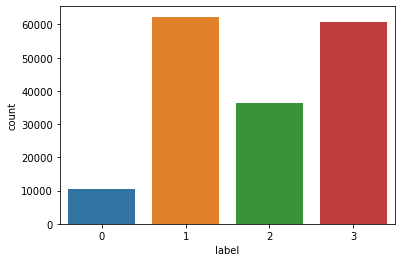

In [64]:
# Visualize number of data point for each class
# df.loc[(df.label == 0), "mood_type" ] = 'Happy'
# df.loc[(df.label == 1), "mood_type" ] = 'Romantic'
# df.loc[(df.label == 2), "mood_type" ] = 'Chill'
# df.loc[(df.label == 3), "mood_type" ] = 'Sad'
sns.countplot(df['label'])

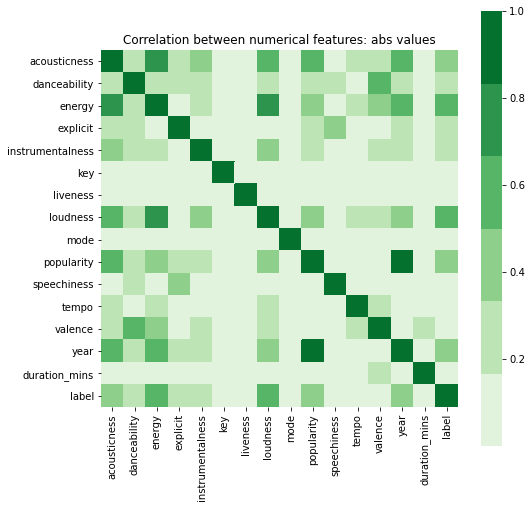

In [70]:
numeric_columns = df.columns[df.dtypes != 'object']
numeric_df = pd.DataFrame(data=df, columns=numeric_columns, index=df.index)

corr = np.abs(numeric_df.corr())
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.color_palette("Greens")
sns.heatmap(corr, cmap=cmap, square=True)
plt.title('Correlation between numerical features: abs values')
plt.show()

In [73]:

# Feature engineering
X = track_features
# Mapping class label to respected integer
y = output_km
target_names = ['Happy', 'Romantic', 'Chill', 'Sad']


In [74]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)

In [75]:
results = []

def run_model(model, alg_name):
   # build the model on training data
   model.fit(X_train, y_train)
 
   # make predictions for test data
   y_pred = model.predict(X_test)
   # calculate the accuracy score
   accuracy =  accuracy_score(y_test, y_pred)
   cm = confusion_matrix(y_test, y_pred)
   scoresDT3 = cross_val_score(model, X_test, y_test, cv=6)
   Cr = classification_report(y_test, y_pred, target_names=target_names)
   results.append((alg_name, accuracy, model))
   print("Model: ", alg_name)
   print("Accuracy on Test Set for {} = {:.2f}\n".format(alg_name,accuracy))
   print(Cr)
   print("{}: CrossVal Accuracy Mean: {:.2f} and Standard Deviation: {:.2f} \n".format(alg_name,scoresDT3.mean(), scoresDT3.std()))

In [76]:
model = DecisionTreeClassifier()
run_model(model, "Decision Tree")

Model:  Decision Tree
Accuracy on Test Set for Decision Tree = 1.00

              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00      2636
    Romantic       1.00      1.00      1.00     15559
       Chill       1.00      1.00      1.00      9074
         Sad       1.00      1.00      1.00     15209

    accuracy                           1.00     42478
   macro avg       1.00      1.00      1.00     42478
weighted avg       1.00      1.00      1.00     42478

Decision Tree: CrossVal Accuracy Mean: 1.00 and Standard Deviation: 0.00 



In [77]:
model = KNeighborsClassifier()
run_model(model, "Nearest Neighbors Classifier")

Model:  Nearest Neighbors Classifier
Accuracy on Test Set for Nearest Neighbors Classifier = 1.00

              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00      2636
    Romantic       1.00      0.99      0.99     15559
       Chill       1.00      1.00      1.00      9074
         Sad       1.00      1.00      1.00     15209

    accuracy                           1.00     42478
   macro avg       1.00      1.00      1.00     42478
weighted avg       1.00      1.00      1.00     42478

Nearest Neighbors Classifier: CrossVal Accuracy Mean: 1.00 and Standard Deviation: 0.00 



In [78]:
model = LogisticRegression(multi_class='multinomial' , solver='lbfgs', max_iter=100)
run_model(model, "Logistic Regression")

C:\Users\dazao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:760: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dazao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:760: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Model:  Logistic Regression
Accuracy on Test Set for Logistic Regression = 0.96

              precision    recall  f1-score   support

       Happy       0.93      0.91      0.92      2636
    Romantic       0.95      0.96      0.95     15559
       Chill       0.93      0.93      0.93      9074
         Sad       0.98      0.97      0.98     15209

    accuracy                           0.96     42478
   macro avg       0.95      0.94      0.95     42478
weighted avg       0.96      0.96      0.96     42478

Logistic Regression: CrossVal Accuracy Mean: 0.95 and Standard Deviation: 0.01 



C:\Users\dazao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:760: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
dt_b = DecisionTreeClassifier(max_depth=1, random_state=42)
model = AdaBoostClassifier(base_estimator=dt_b)
run_model(model, "Adaboost Classifier")

Model:  Adaboost Classifier
Accuracy on Test Set for Adaboost Classifier = 0.93

              precision    recall  f1-score   support

       Happy       0.00      0.00      0.00      2636
    Romantic       1.00      0.99      1.00     15559
       Chill       0.77      1.00      0.87      9074
         Sad       1.00      1.00      1.00     15209

    accuracy                           0.93     42478
   macro avg       0.69      0.75      0.72     42478
weighted avg       0.89      0.93      0.91     42478

Adaboost Classifier: CrossVal Accuracy Mean: 0.95 and Standard Deviation: 0.02 



C:\Users\dazao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
model = RandomForestClassifier(n_estimators=10)
run_model(model, "Random Forest")

Model:  Random Forest
Accuracy on Test Set for Random Forest = 1.00

              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00      2636
    Romantic       1.00      1.00      1.00     15559
       Chill       1.00      1.00      1.00      9074
         Sad       1.00      1.00      1.00     15209

    accuracy                           1.00     42478
   macro avg       1.00      1.00      1.00     42478
weighted avg       1.00      1.00      1.00     42478

Random Forest: CrossVal Accuracy Mean: 1.00 and Standard Deviation: 0.00 



In [81]:
from tabulate import tabulate

print("Classification Results")
rows = list()

for res in results:
    rows.append([res[0], res[1] ])
    
tab = tabulate(rows, headers=['Algorithm', 'Accuracy'], tablefmt='fancy_grid')
print(tab)

Classification Results
╒══════════════════════════════╤════════════╕
│ Algorithm                    │   Accuracy │
╞══════════════════════════════╪════════════╡
│ Decision Tree                │   0.998894 │
├──────────────────────────────┼────────────┤
│ Nearest Neighbors Classifier │   0.99581  │
├──────────────────────────────┼────────────┤
│ Logistic Regression          │   0.95586  │
├──────────────────────────────┼────────────┤
│ Adaboost Classifier          │   0.934672 │
├──────────────────────────────┼────────────┤
│ Random Forest                │   0.999294 │
╘══════════════════════════════╧════════════╛


In [82]:
cases_mix = cases.sample(frac=1.0, random_state=42).reset_index(drop=True)
cases_mix
cases_drop = cases_mix.drop(['artists', 'name', 'popularity', 'id',  'release_date'], axis=1)
cases_enc = pd.get_dummies(cases_drop, columns=['mode'])

cases_X = cases_enc.drop(['label', 'mode_0', 'mode_1', 'explicit','key','instrumentalness','speechiness','tempo','year','duration_mins'], axis=1)
cases_y = cases_mix[['label']]

cases_pred = pd.DataFrame(results[4][2].predict(cases_X), columns=['mood_rate'])

In [83]:
pd.set_option('display.max_rows', df.shape[0]+1)
res = pd.concat([cases_mix, cases_pred], axis=1)
res.iloc[:,[1,11,12,19,20]]

,artists,name,popularity,label,mood_rate
0,"['Ryan Gosling', 'Emma Stone']","City Of Stars - From ""La La Land"" Soundtrack",65,2,2
1,['RY X'],Only,57,2,2
2,['YoungBoy Never Broke Again'],Fine By Time,64,3,3
3,"['Rain Sounds', 'Mindfulness Meditation Music ...",Awakening Rain,65,0,0
4,['Future'],Tycoon,66,3,3
5,['Shoreline Mafia'],Whuss The Deal,62,1,1
